In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import tensorflow as tf
import os, sys, time
sys.path.insert(0, '../')
os.environ["CUDA_VISIBLE_DEVICES"]=""
import utils, optimization, metrics, plot, data, evaluation

# Parameters

In [3]:
ns = 64
nsamples = 4000
k = 10

# Data handling

Load the data

In [4]:
images, raw_images = data.load_samples(nsamples = nsamples, permute=True, k=k)
images = data.make_smaller_samples(images, ns)
raw_images = data.make_smaller_samples(raw_images, ns)   

Select 4000 samples out of 15000.


# A) Load the model

In [5]:
# pathgan = '../../../saved_result/WGAN64_finalcheckpoints/'
# checkpoint = '169800'

pathgan = '../../../saved_result/WGAN64_testcheckpoints/'
checkpoint = '77600'

obj = evaluation.load_gan(pathgan=pathgan)



Generator 
------------------------------------------------------------
     The input is of size (?, 100)
     0 Full layer with 1024 outputs
         Size of the variables: (?, 1024)
     Reshape to (?, 4, 4, 64)
     1 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 8, 8, 64)
     2 Deconv layer with 256 channels
         Batch norm
         Size of the variables: (?, 16, 16, 256)
     3 Deconv layer with 512 channels
         Batch norm
         Size of the variables: (?, 32, 32, 512)
     4 Deconv layer with 256 channels
         Batch norm
         Size of the variables: (?, 64, 64, 256)
     5 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 64, 64, 64)
     6 Deconv layer with 1 channels
         Size of the variables: (?, 64, 64, 1)
    Non lienarity: tanh
     The output is of size (?, 64, 64, 1)
------------------------------------------------------------

Discriminator 
------------------------------

# Generate some samples

In [6]:
N = 4000
gen_sample, gen_sample_raw = evaluation.generate_samples(N, obj, pathgan, checkpoint)



 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../../../saved_result/WGAN64_testcheckpoints/WGAN64-77600


Print a few samples

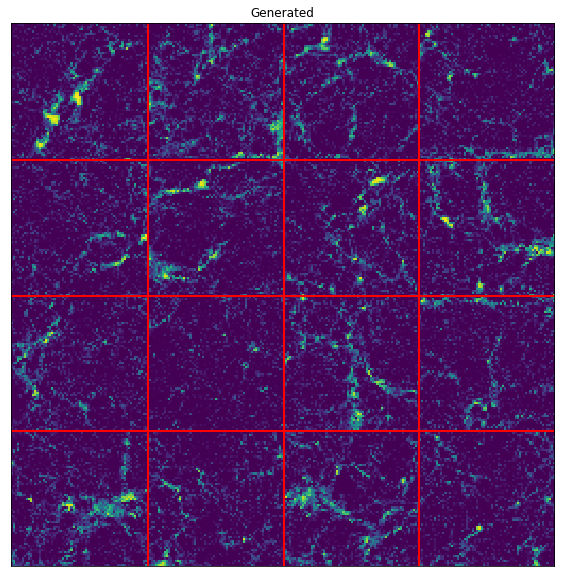

In [7]:
plt.figure(figsize=(10,10))
utils.draw_images(gen_sample,nx=4,ny=4)
_ = plt.title('Generated')

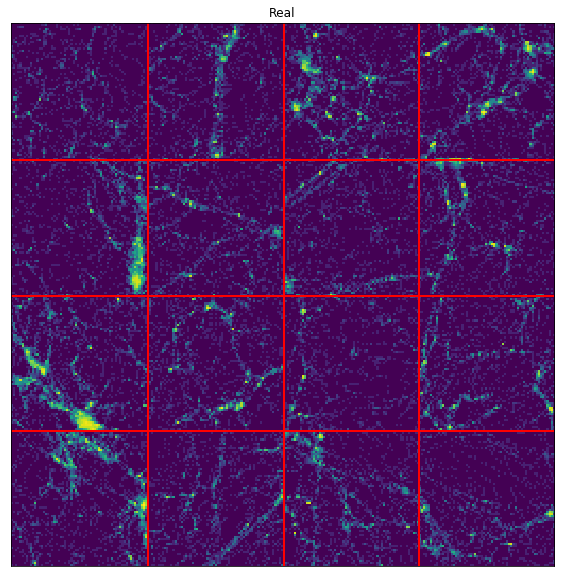

In [8]:
plt.figure(figsize=(10,10))
utils.draw_images(images,nx=4,ny=4)
_ = plt.title('Real')

# Evaluate the model

Compute the real PSD over all samples

Log l2 PSD loss: 0.3280964390950911
L2 PSD loss: 3525.863509694885
Log l1 PSD loss: 0.4068677271316937
L1 PSD loss: 51.60410219504509


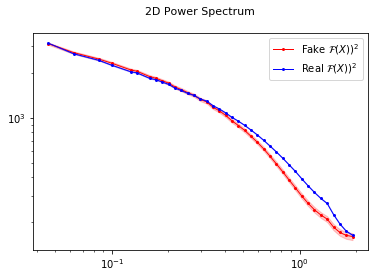

In [9]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(raw_images, gen_sample_raw)


Log l2 Peak Count loss: 6.887473207456779
L2 Peak Count loss: 1238.1555482232907
Log l1 Peak Count loss: 1.8491399312094603
L1 Peak Count loss: 10.0641703125


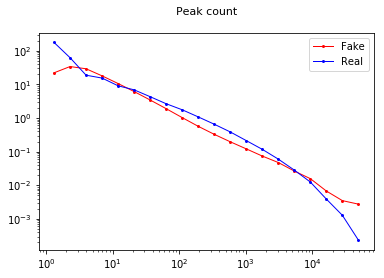

In [10]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(raw_images, gen_sample_raw)

Log l2 Mass histogram loss: 2.207678805699655
L2 Peak Mass histogram: 15576.920326742615
Log l1 Mass histogram loss: 1.1950319396407065
L1 Mass histogram loss: 45.36617968749998


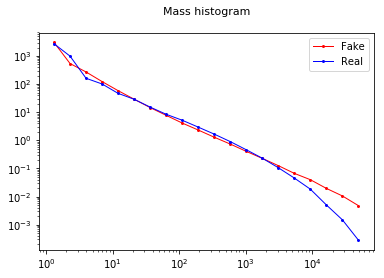

In [11]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(raw_images, gen_sample_raw)